In [161]:
import pandas as pd
import numpy as np
import os
import lightgbm as lgb
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
import pickle

In [104]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

In [ ]:
dataset_infos = pd.read_csv(r"C:\Users\SukurovSB\Desktop\Guided_Research_New\guidedresearchproject-ShamilShukurov\data\dataset_infos.csv")

In [ ]:
dataset_infos

,Unnamed: 0,Dataset_Name,Row_Count,Minority_Class_Percent,Target_Column
0,0,Abalone,1477,4.520,target
1,1,Adult,32561,24.080,target
2,2,Churn,7043,26.530,target
3,3,Contraceptive,1743,22.600,target
4,4,Covertype,581012,14.770,target
5,5,Fraud,284807,0.172,Class
6,6,Fraud2,650000,0.500,is_fraud
7,7,Letter-a,20000,3.940,letter_a
8,8,Letter-vowel,20000,19.390,is_vowel
9,9,Pendigits,10992,9.590,is_9


In [ ]:
train_data_folder = r"C:\Users\SukurovSB\Desktop\train_datasets"
test_data_folder = r"C:\Users\SukurovSB\Desktop\test_datasets"

In [91]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")

In [5]:
letter_a_train

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
0,4,7,5,5,4,6,7,3,7,11,8,9,3,8,4,8,0
1,4,7,6,5,5,6,8,3,7,11,8,9,3,8,4,7,0
2,3,5,4,3,3,7,8,5,5,7,7,6,5,9,2,6,0
3,4,10,6,7,6,5,7,5,7,6,6,12,3,8,6,9,0
4,4,10,6,8,4,8,11,2,3,4,10,9,3,11,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,5,11,4,6,3,7,7,4,3,9,6,7,3,10,8,7,0
15996,3,7,5,5,4,9,11,6,4,6,5,7,2,8,6,4,0
15997,3,4,6,3,2,9,6,2,8,10,3,7,2,7,3,9,0
15998,3,8,4,6,2,7,8,0,8,14,6,6,0,8,1,7,0


In [6]:
letter_a_test

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
0,3,6,5,6,4,6,7,3,8,8,6,9,3,7,7,6,0
1,4,11,6,8,8,7,8,3,5,6,6,10,6,11,7,5,0
2,3,4,5,3,2,10,2,2,1,9,2,9,2,6,2,8,1
3,2,4,2,3,2,7,7,5,7,7,6,8,2,8,5,10,0
4,4,5,5,7,3,8,7,8,6,6,7,9,3,8,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4,7,6,5,7,6,6,3,2,8,6,7,3,7,11,2,0
3996,2,1,3,3,1,6,12,3,6,8,11,7,1,11,1,7,0
3997,5,10,7,9,4,8,5,9,8,5,4,8,3,8,4,8,0
3998,4,5,5,7,5,10,11,5,4,5,8,8,5,10,9,5,0


In [7]:
target_col = "letter_a"

In [8]:
df_train = letter_a_train.copy()
df_test  = letter_a_test.copy()

In [89]:
X_test = df_test.drop(columns=target_col)
y_test = df_test[target_col]

## Lightgbm baseline

In [10]:
X_train = df_train.drop(columns=target_col)
y_train = df_train[target_col]

In [11]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [12]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

In [13]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.97      0.98       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00       640

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



0.999968630130063


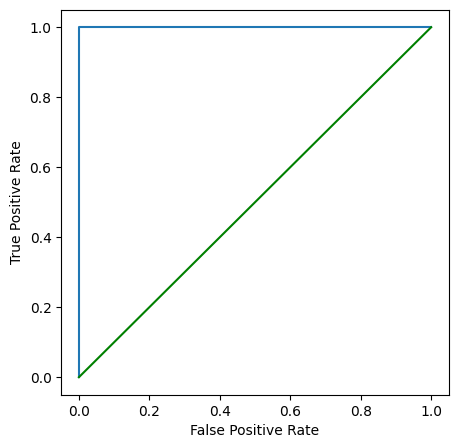

In [14]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## Upsample

In [15]:
df_majority = df_train[(df_train[target_col]==0)]
df_minority = df_train[(df_train[target_col]==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df_majority.shape[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [133]:
df_upsampled.letter_a.value_counts()

1    15360
0    15360
Name: letter_a, dtype: int64

In [17]:
X_train = df_upsampled.drop(columns=target_col)
y_train = df_upsampled[target_col]

In [18]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [19]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

In [20]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.99      0.99       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00     15360

    accuracy                           1.00     30720
   macro avg       1.00      1.00      1.00     30720
weighted avg       1.00      1.00      1.00     30720



0.9999512024245424


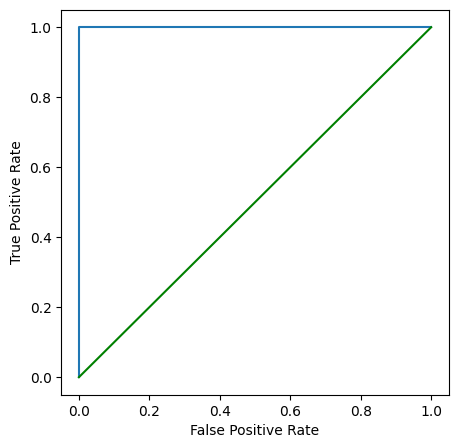

In [21]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## Downsampling

In [22]:
df_majority = df_train[(df_train[target_col]==0)]
df_minority = df_train[(df_train[target_col]==1)]
# downsample majority class
df_majority_upsampled = resample(df_majority,
                                 replace=False,    # sample with replacement
                                 n_samples= df_minority.shape[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_upsampled])

In [23]:
df_downsampled

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter_a
23,2,2,4,3,1,6,2,2,2,5,2,8,2,6,2,6,1
65,3,6,6,4,3,7,5,2,3,6,2,6,2,6,3,5,1
71,3,7,6,5,4,5,5,3,3,3,2,6,4,6,4,4,1
73,3,8,5,6,3,12,3,2,2,10,2,9,2,6,2,8,1
80,4,11,6,8,5,7,4,2,1,7,1,8,2,7,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11674,1,1,2,1,0,3,12,4,3,11,9,6,0,8,2,7,0
5824,3,5,5,4,2,7,7,3,8,11,5,7,1,8,4,8,0
3571,5,9,5,7,3,4,12,1,2,8,10,7,3,10,1,7,0
10179,3,5,5,8,3,11,5,3,5,10,2,7,2,7,5,11,0


In [30]:
X_train = df_downsampled.drop(columns=target_col)
y_train = df_downsampled[target_col]

In [25]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [26]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

In [41]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.98      0.99      0.99       149

    accuracy                           1.00      4000
   macro avg       0.99      1.00      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00     15360

    accuracy                           1.00     30720
   macro avg       1.00      1.00      1.00     30720
weighted avg       1.00      1.00      1.00     30720



0.9999529451950944


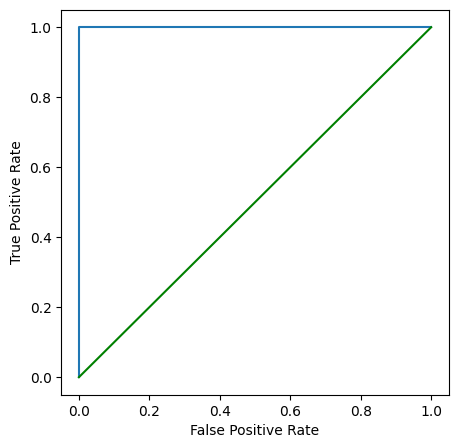

In [43]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## SMOTE

In [45]:
X_train = df_train.drop(columns=target_col)
y_train = df_train[target_col]

In [125]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [37]:
oversampled

,letter_a,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,0,4,7,5,5,4,6,7,3,7,11,8,9,3,8,4,8
1,0,4,7,6,5,5,6,8,3,7,11,8,9,3,8,4,7
2,0,3,5,4,3,3,7,8,5,5,7,7,6,5,9,2,6
3,0,4,10,6,7,6,5,7,5,7,6,6,12,3,8,6,9
4,0,4,10,6,8,4,8,11,2,3,4,10,9,3,11,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30715,1,6,13,6,7,5,9,3,5,2,10,5,12,7,1,6,11
30716,1,3,7,5,5,3,11,2,2,2,9,2,9,3,7,3,9
30717,1,3,8,5,6,3,12,2,2,2,10,2,9,2,6,2,8
30718,1,2,4,4,3,2,8,2,2,2,8,2,8,1,6,1,7


In [47]:
X_train = oversampled.drop(columns=target_col)
y_train = oversampled[target_col]

In [39]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [53]:
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)
prediction_proba_train=clf.predict_proba(X_train)
prediction_proba_test=clf.predict_proba(X_test)

NotFittedError: ignored

In [55]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.98      0.98       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00       640

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



0.9999546879656465


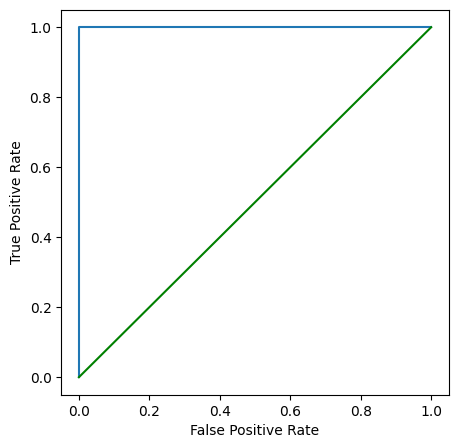

In [57]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## BalancedBaggingClassifier

In [50]:
X_train = df_train.drop(columns=target_col)
y_train = df_train[target_col]

In [52]:

clf = lgb.LGBMClassifier()
#Create an instance
classifier = BalancedBaggingClassifier(estimator=clf,
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)

BalancedBaggingClassifier(estimator=LGBMClassifier(), random_state=42,
                          sampling_strategy='not majority')

In [54]:
prediction_train = classifier.predict(X_train)
prediction_test = classifier.predict(X_test)
prediction_proba_train=classifier.predict_proba(X_train)
prediction_proba_test=classifier.predict_proba(X_test)

In [56]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.98      0.98       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00       640

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



0.9999546879656465


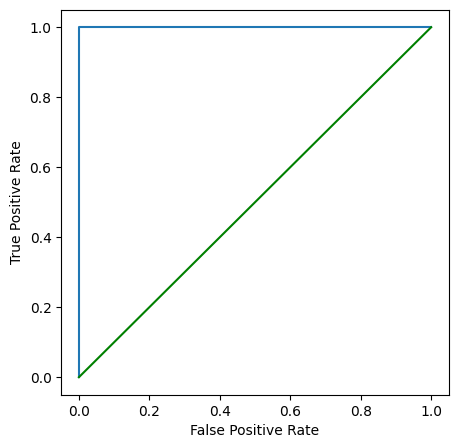

In [58]:
print(roc_auc_score(y_test, prediction_proba_test[:,1]))
plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])

## LightGBM with imbalance setting

In [59]:
X_train = df_train.drop(columns=target_col)
y_train = df_train[target_col]

In [61]:
d_train=lgb.Dataset(X_train, label=y_train)

d_test=lgb.Dataset(X_test, label=y_test)


parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true'
}

clf2 = lgb.train(params=parameters, train_set=d_train, valid_sets=d_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 640, number of negative: 15360
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040000 -> initscore=-3.178054
[LightGBM] [Info] Start training from score -3.178054
[1]	valid_0's auc: 0.984033
[2]	valid_0's auc: 0.99752
[3]	valid_0's auc: 0.997996
[4]	valid_0's auc: 0.998394
[5]	valid_0's auc: 0.998469
[6]	valid_0's auc: 0.998788
[7]	valid_0's auc: 0.998753
[8]	valid_0's auc: 0.99887
[9]	valid_0's auc: 0.999209
[10]	valid_0's auc: 0.999315
[11

In [62]:
prediction_train_proba = clf2.predict(X_train)
prediction_test_proba = clf2.predict(X_test)

In [64]:
threshold = 0.5

In [65]:
prediction_train = np.where(prediction_train_proba>threshold,1,0)
prediction_test = np.where(prediction_test_proba>threshold,1,0)

In [66]:
print(classification_report(y_test,prediction_test,zero_division=True))
print(classification_report(y_train,prediction_train,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3851
           1       0.99      0.99      0.99       149

    accuracy                           1.00      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15360
           1       1.00      1.00      1.00       640

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



0.9999512024245424


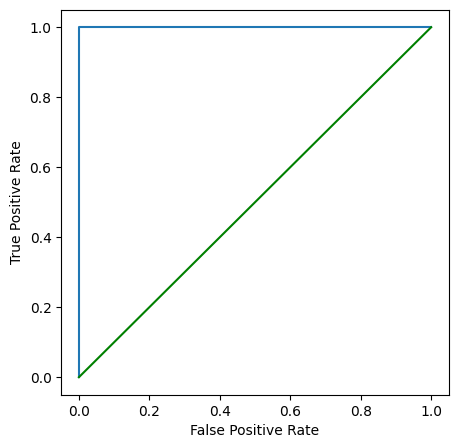

In [67]:
print(roc_auc_score(y_test, prediction_test_proba))

plot_sklearn_roc_curve(y_test, prediction_test_proba)

# Making functions for DRY Code

## Base LGBM

In [105]:
def base_lgbm(df_train:pd.DataFrame,
              df_test:pd.DataFrame,
              target_col:str,
              dataset_name:str,
              model_name:str="LGBM Baseline",
              message:str="Building LGBM Model..."):
  # Train data
  X_train = df_train.drop(columns=target_col)
  y_train = df_train[target_col]

  # Test data
  X_test = df_test.drop(columns=target_col)
  y_test = df_test[target_col]

  print(message)
  clf = lgb.LGBMClassifier()
  clf.fit(X_train, y_train)

  prediction_train = clf.predict(X_train)
  prediction_test = clf.predict(X_test)
  prediction_proba_train=clf.predict_proba(X_train)
  prediction_proba_test=clf.predict_proba(X_test)

  cr_test = classification_report(y_test,prediction_test,zero_division=True, output_dict=True)
  f1_test = cr_test['1']['f1-score']
  acc_test = cr_test['accuracy']
  auc_test = roc_auc_score(y_test, prediction_proba_test[:,1])
  cr_train = classification_report(y_train,prediction_train,zero_division=True, output_dict=True)
  f1_train = cr_train['1']['f1-score']
  acc_train = cr_train['accuracy']
  auc_train = roc_auc_score(y_train, prediction_proba_train[:,1])

  report = {
      "Dataset":dataset_name,
      "Model":model_name,
      "f1_test": f1_test,
      "f1_train":f1_train,
      "accuracy_test" : acc_test,
      "accuracy_train" :acc_train,
      "AUC_test" :auc_test,
      "AUC_train" :auc_train
  }
  print("ROC Curve for test data: {}".format(auc_test))
  plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])
  return clf, report


Building LGBM Model...
ROC Curve for test data: 0.999968630130063


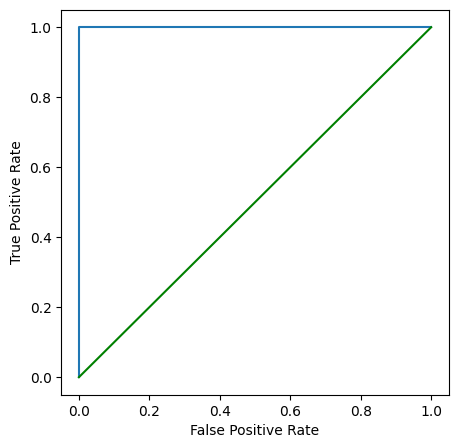

In [102]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")

In [103]:
rep

{'Dataset': 'Letter_A',
 'Model': 'LGBM Baseline',
 'f1_test': 0.9797297297297297,
 'f1_train': 1.0,
 'accuracy_test': 0.9985,
 'accuracy_train': 1.0,
 'AUC_test': 0.999968630130063,
 'AUC_train': 1.0}

## Upsample function

In [114]:
def upsample(df_train:pd.DataFrame,
              df_test:pd.DataFrame,
              target_col:str,
              dataset_name:str,
              model_name:str="LGBM Upsample",
              message:str="Building LGBM Upsample Model..."):
  print("Upsampling is being applied...")
  df_majority = df_train[(df_train[target_col]==0)]
  df_minority = df_train[(df_train[target_col]==1)]
  # upsample minority class
  df_minority_upsampled = resample(df_minority,
                                  replace=True,    # sample with replacement
                                  n_samples= df_majority.shape[0], # to match majority class
                                  random_state=42)  # reproducible results
  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_minority_upsampled, df_majority])
  return base_lgbm(df_upsampled, df_test, target_col, dataset_name, model_name, message)

Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.9999512024245424


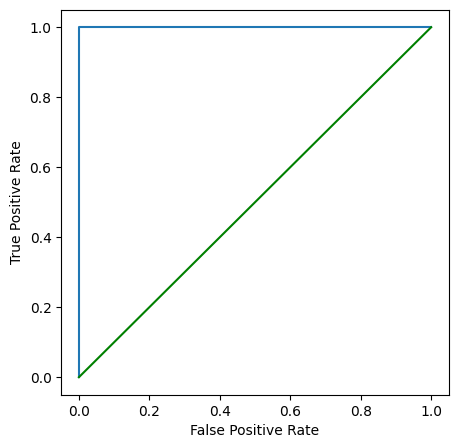

In [117]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
model, rep = upsample(letter_a_train, letter_a_test,"letter_a","Letter_A")

## DownSample Function

In [121]:
def downsample(df_train:pd.DataFrame,
               df_test:pd.DataFrame,
               target_col:str,
               dataset_name:str,
               model_name:str="LGBM Downsample",
               message:str="Building LGBM Downsample Model..."):
  print("Downsampling is being applied...")
  df_majority = df_train[(df_train[target_col]==0)]
  df_minority = df_train[(df_train[target_col]==1)]
  # downsample majority class
  df_majority_upsampled = resample(df_majority,
                                  replace=False,    # sample with replacement
                                  n_samples= df_minority.shape[0], # to match majority class
                                  random_state=42)  # reproducible results
  # Combine majority class with upsampled minority class
  df_downsampled = pd.concat([df_minority, df_majority_upsampled])
  return base_lgbm(df_downsampled, df_test, target_col, dataset_name, model_name, message)

Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.9998745205202519


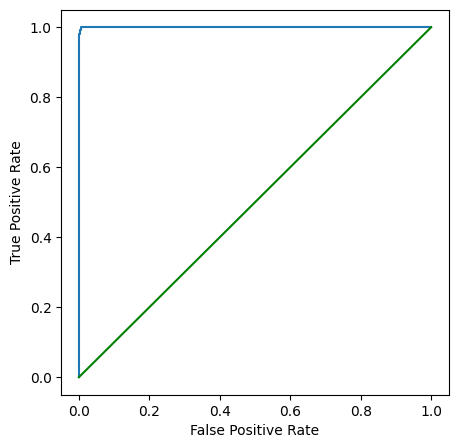

In [128]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
model, rep = downsample(letter_a_train, letter_a_test,"letter_a","Letter_A")

## SMOTE LGBM

In [131]:
def smote_lgbm(df_train:pd.DataFrame,
               df_test:pd.DataFrame,
               target_col:str,
               dataset_name:str,
               model_name:str="SMOTE LGBM",
               message:str="Building SMOTE LGBM Model..."):
  print("SMOTE is being applied...")
  # Resampling the minority class. The strategy can be changed as required.
  sm = SMOTE(sampling_strategy='minority', random_state=42)
  # Fit the model to generate the data.
  oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
  oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
  return base_lgbm(oversampled, df_test, target_col, dataset_name, model_name, message)

SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.9999529451950944


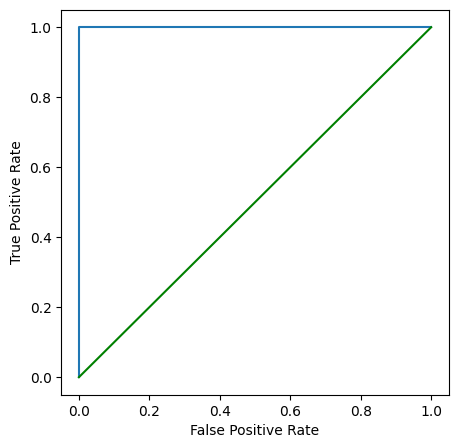

In [129]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
model, rep = smote_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")

In [130]:
rep

{'Dataset': 'Letter_A',
 'Model': 'SMOTE LGBM',
 'f1_test': 0.9866666666666667,
 'f1_train': 1.0,
 'accuracy_test': 0.999,
 'accuracy_train': 1.0,
 'AUC_test': 0.9999529451950944,
 'AUC_train': 0.9999999999999999}

## Balanced Bagging

In [137]:
def balanced_bagging_lgbm(df_train:pd.DataFrame,
                          df_test:pd.DataFrame,
                          target_col:str,
                          dataset_name:str,
                          model_name:str="LGBM Balanced Bagging",
                          message:str="Building LGBM Balanced Bagging Model..."):
  # Train data
  X_train = df_train.drop(columns=target_col)
  y_train = df_train[target_col]

  # Test data
  X_test = df_test.drop(columns=target_col)
  y_test = df_test[target_col]

  print(message)
  clf = lgb.LGBMClassifier()
  classifier = BalancedBaggingClassifier(estimator=clf,
                                  sampling_strategy='not majority',
                                  replacement=False,
                                  random_state=42)
  classifier.fit(X_train, y_train)

  prediction_train = classifier.predict(X_train)
  prediction_test = classifier.predict(X_test)
  prediction_proba_train=classifier.predict_proba(X_train)
  prediction_proba_test=classifier.predict_proba(X_test)

  cr_test = classification_report(y_test,prediction_test,zero_division=True, output_dict=True)
  f1_test = cr_test['1']['f1-score']
  acc_test = cr_test['accuracy']
  auc_test = roc_auc_score(y_test, prediction_proba_test[:,1])
  cr_train = classification_report(y_train,prediction_train,zero_division=True, output_dict=True)
  f1_train = cr_train['1']['f1-score']
  acc_train = cr_train['accuracy']
  auc_train = roc_auc_score(y_train, prediction_proba_train[:,1])

  report = {
      "Dataset":dataset_name,
      "Model":model_name,
      "f1_test": f1_test,
      "f1_train":f1_train,
      "accuracy_test" : acc_test,
      "accuracy_train" :acc_train,
      "AUC_test" :auc_test,
      "AUC_train" :auc_train
  }
  print("ROC Curve for test data: {}".format(auc_test))
  plot_sklearn_roc_curve(y_test,prediction_proba_test[:,1])
  return classifier, report

Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.9999546879656465


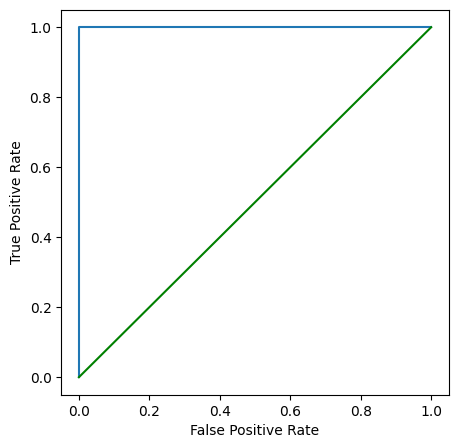

In [144]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
model, rep = balanced_bagging_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")

In [136]:
rep

{'Dataset': 'Letter_A',
 'Model': 'LGBM Balanced Bagging',
 'f1_test': 0.9831649831649831,
 'f1_train': 0.9984350547730829,
 'accuracy_test': 0.99875,
 'accuracy_train': 0.999875,
 'AUC_test': 0.9999546879656465,
 'AUC_train': 1.0}

## LGBM Imbalanced

In [148]:
def lgbm_imbalance(df_train:pd.DataFrame,
                   df_test:pd.DataFrame,
                   target_col:str,
                   dataset_name:str,
                   model_name:str="LGBM_Imbalance",
                   message:str="Building LGBM Imbalance Model..."):
  # Train data
  X_train = df_train.drop(columns=target_col)
  y_train = df_train[target_col]

  # Test data
  X_test = df_test.drop(columns=target_col)
  y_test = df_test[target_col]

  d_train=lgb.Dataset(X_train, label=y_train)
  d_test=lgb.Dataset(X_test, label=y_test)

  parameters = {
      'objective': 'binary',
      'metric': 'auc',
      'is_unbalance': 'true'
  }

  clf2 = lgb.train(params=parameters, train_set=d_train, valid_sets=d_test, verbose_eval=0)

  prediction_train_proba = clf2.predict(X_train)
  prediction_test_proba = clf2.predict(X_test)

  prediction_train = np.where(prediction_train_proba>0.5,1,0)
  prediction_test = np.where(prediction_test_proba>0.5,1,0)

  cr_test = classification_report(y_test,prediction_test,zero_division=True, output_dict=True)
  f1_test = cr_test['1']['f1-score']
  acc_test = cr_test['accuracy']
  auc_test = roc_auc_score(y_test, prediction_test_proba)
  cr_train = classification_report(y_train,prediction_train,zero_division=True, output_dict=True)
  f1_train = cr_train['1']['f1-score']
  acc_train = cr_train['accuracy']
  auc_train = roc_auc_score(y_train, prediction_train_proba)

  report = {
      "Dataset":dataset_name,
      "Model":model_name,
      "f1_test": f1_test,
      "f1_train":f1_train,
      "accuracy_test" : acc_test,
      "accuracy_train" :acc_train,
      "AUC_test" :auc_test,
      "AUC_train" :auc_train
  }
  print("ROC Curve for test data: {}".format(auc_test))
  plot_sklearn_roc_curve(y_test, prediction_test_proba)
  return clf2, report


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 640, number of negative: 15360
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 16
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040000 -> initscore=-3.178054
[LightGBM] [Info] Start training from score -3.178054
ROC Curve for test data: 0.9999512024245424


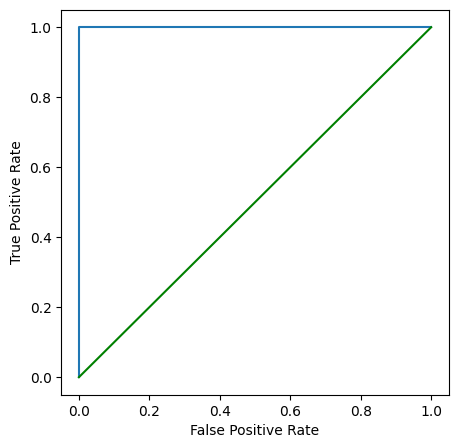

In [158]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
model, rep = lgbm_imbalance(letter_a_train, letter_a_test,"letter_a","Letter_A")

## Combining ALL

In [170]:
def built_experiment(df_train:pd.DataFrame,
                     df_test:pd.DataFrame,
                     target_col:str,
                     dataset_name:str):
  print("Running Experiment...")
  print("Dataset Name: {}\nTarget Column: {}".format(dataset_name, target_col))

  lgbm_base_model, rep_lgbm_base = base_lgbm(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_lgbm_base_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(lgbm_base_model, f)

  upsample_model, rep_upsample = upsample(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_upsample_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(upsample_model, f)

  downsample_model, rep_downsample = downsample(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_downsample_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(downsample_model, f)

  smote_lgbm_model, rep_smote_lgbm = smote_lgbm(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_smote_lgbm_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(smote_lgbm_model, f)

  balanced_bagging_lgbm_model, rep_bb = balanced_bagging_lgbm(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_balanced_bagging_lgbm_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(balanced_bagging_lgbm_model, f)

  lgbm_imbalance_model, rep_lgbm_imbalance = lgbm_imbalance(df_train.copy(), df_test.copy(),target_col,dataset_name)
  print("Saving model as pickle...")
  with open("{}_lgbm_imbalance_model.pkl".format(dataset_name), "wb") as f:
      pickle.dump(lgbm_imbalance_model, f)

  return pd.DataFrame([rep_lgbm_base,rep_upsample,rep_downsample,rep_smote_lgbm,rep_bb,rep_lgbm_imbalance])

Running Experiment...
Dataset Name: Letter_A
Target Column: letter_a
Building LGBM Model...
ROC Curve for test data: 0.999968630130063
Saving model as pickle...
Upsampling is being applied...
Building LGBM Upsample Model...
ROC Curve for test data: 0.9999512024245424
Saving model as pickle...
Downsampling is being applied...
Building LGBM Downsample Model...
ROC Curve for test data: 0.9998745205202519
Saving model as pickle...
SMOTE is being applied...
Building SMOTE LGBM Model...
ROC Curve for test data: 0.9999529451950944
Saving model as pickle...
Building LGBM Balanced Bagging Model...
ROC Curve for test data: 0.9999546879656465
Saving model as pickle...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 640, number of negative: 15360
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


ROC Curve for test data: 0.9999512024245424
Saving model as pickle...


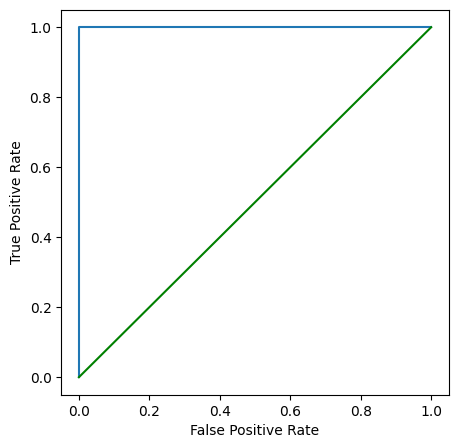

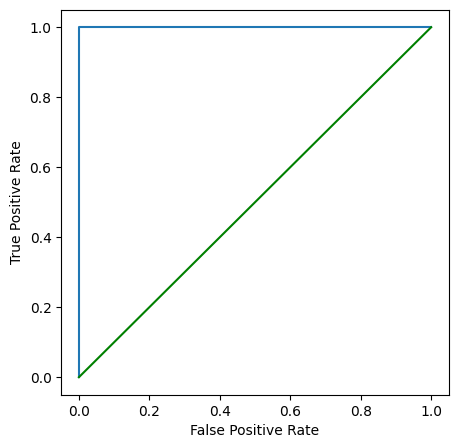

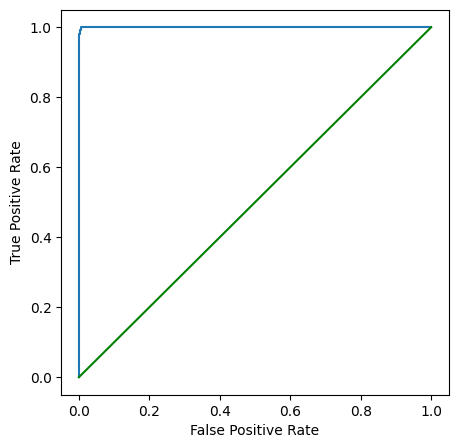

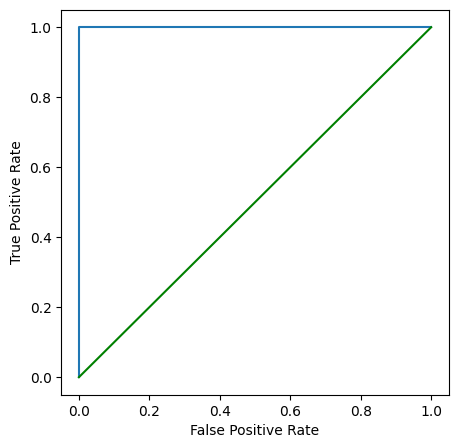

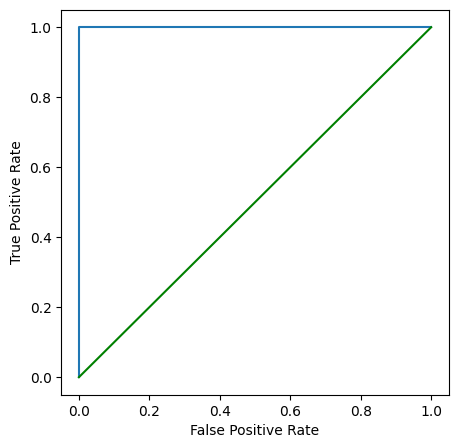

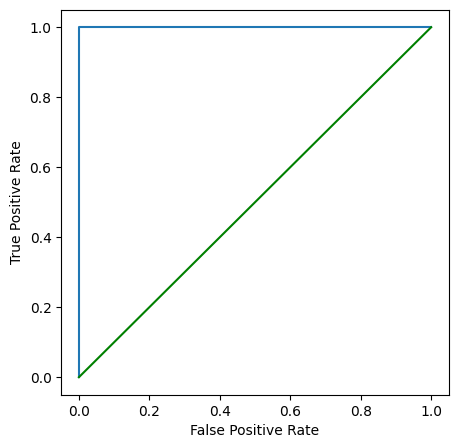

In [168]:
letter_a_train = pd.read_csv("letter_a_train.csv")
letter_a_test = pd.read_csv("letter_a_test.csv")
#model, rep = base_lgbm(letter_a_train, letter_a_test,"letter_a","Letter_A")
rep = built_experiment(letter_a_train, letter_a_test,"letter_a","Letter_A")

In [169]:
rep

,Dataset,Model,f1_test,f1_train,accuracy_test,accuracy_train,AUC_test,AUC_train
0,Letter_A,LGBM Baseline,0.979730,1.000000,0.99850,1.000000,0.999969,1.0
1,Letter_A,LGBM Upsample,0.986577,1.000000,0.99900,1.000000,0.999951,1.0
2,Letter_A,LGBM Downsample,0.832402,1.000000,0.98500,1.000000,0.999875,1.0
3,Letter_A,SMOTE LGBM,0.986667,1.000000,0.99900,1.000000,0.999953,1.0
4,Letter_A,LGBM Balanced Bagging,0.983165,0.998435,0.99875,0.999875,0.999955,1.0
5,Letter_A,LGBM_Imbalance,0.986577,1.000000,0.99900,1.000000,0.999951,1.0
